In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.io import fits
from tqdm import tqdm

In [3]:
# Load data
def df_earnshaw():
    ulx_file = '../data/external/Earnshaw_ULX_cat/earnshaw_Xraycatalogue.fits'
    with fits.open(ulx_file) as hdul:
        #hdul.info()
        data = pd.DataFrame(hdul[1].data)
    return data

# Earnshaw (2018) Catalogue

In [4]:
df_earnshaw()

,DETID,SRCID,DR3SRCID,DR3DETID,DR3DETDIST,DR3SRCDIST,DR3MULT,IAUNAME,SRC_NUM,OBS_ID,...,EP_8_LUMINOSITY_MAX,IN_CP02,IN_S04,IN_LB05,IN_LM05,IN_S11,IN_W11,IS_COMPLETE_38,IS_COMPLETE_39,IS_COMPLETE_40
0,382,118684,156,156,3.412370,3.412370,1,3XMM J000155.3-152551,26,0204790101,...,3.706074e+36,False,False,False,False,False,False,True,True,True
1,396,118656,163,163,1.785300,1.785300,1,3XMM J000158.1-152758,3,0204790101,...,9.236017e+36,False,False,False,False,False,False,True,True,True
2,410,118560,170,170,0.752346,0.752346,1,3XMM J000201.4-153034,8,0204790101,...,6.361064e+36,False,False,False,False,False,False,True,True,True
3,430,118540,178,178,2.738700,2.738700,1,3XMM J000205.0-152504,9,0204790101,...,6.028317e+36,False,False,False,False,False,False,True,True,True
4,5169,122027,2335,2497,1.099720,1.099720,1,3XMM J002012.0+591756,79,0152260101,...,7.193321e+35,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,525383,43541,189988,-2147483648,NaN,2.288190,2,3XMM J233843.6-562849,25,0677770133,...,1.031139e+41,False,False,False,False,False,True,False,False,False
2135,525632,236202,190090,245060,1.201990,1.201990,1,3XMM J234000.7-121708,18,0055990301,...,1.107447e+39,False,False,False,False,False,True,False,False,False
2136,527019,241323,-2147483648,-2147483648,NaN,NaN,-32768,3XMM J234420.0+095548,24,0301651001,...,4.331900e+39,False,False,False,False,False,False,False,True,True
2137,529799,239871,191027,246016,0.586219,0.586219,1,3XMM J235122.5+200638,9,0093190301,...,1.188354e+40,False,False,False,False,False,True,False,False,True


In [5]:
data = df_earnshaw()

# Filter to only include ULXs
print(f'number of sources in catalogue = {len(data["SRCID"].value_counts())}')
data = data[data['EP_8_LUMINOSITY_MAX'] >1E39]
print(f'number of ULX (EP_8_LUMINOSITY_MAX>1E39) sources = {len(data["SRCID"].value_counts())}')

number of sources in catalogue = 1314
number of ULX (EP_8_LUMINOSITY_MAX>1E39) sources = 384


In [6]:
#Sources with more than 1 obervation
sources = data['SRCID'].value_counts()[data['SRCID'].value_counts() > 1].sort_values(ascending=False)
print(f'number of ULXs with more than 1 observation = {len(sources)}')

number of ULXs with more than 1 observation = 81


In [7]:
# Looking at a specific source
src901 = data[data['SRCID'] == 901].sort_values(by=['MJD_START'])
src901[['SRCID','IAUNAME', 'DISTANCE_BEST', 'EP_8_FLUX', 'EP_8_FLUX_ERR', 'EP_8_LUMINOSITY', 'EP_8_LUMINOSITY_ERR', 'EP_8_LUMINOSITY_MAX']]

,SRCID,IAUNAME,DISTANCE_BEST,EP_8_FLUX,EP_8_FLUX_ERR,EP_8_LUMINOSITY,EP_8_LUMINOSITY_ERR,EP_8_LUMINOSITY_MAX
622,901,3XMM J031818.4-663002,4.61,2.612020e-13,1.715000e-13,6.643242e+38,4.361820e+38,1.100506e+39
618,901,3XMM J031818.4-663002,4.61,3.732680e-13,3.597600e-14,9.493456e+38,9.149902e+37,1.040845e+39
623,901,3XMM J031818.4-663002,4.61,3.476750e-13,1.052080e-13,8.842540e+38,2.675792e+38,1.151833e+39
619,901,3XMM J031818.4-663002,4.61,3.819240e-13,4.510720e-14,9.713607e+38,1.147227e+38,1.086083e+39
610,901,3XMM J031818.4-663002,4.61,4.011020e-13,2.610380e-14,1.020137e+39,6.639071e+37,1.086528e+39


# Transient Sources in Earnshaw 2018
## Our Sampling
- Total Sources = 1314
- ULX Sources = 386/1314 (29.3%)
- ULX + multiple_obs = 81/1314 (6.16%) or 81/386 (20.9%)
- ULX with multiple obs classification:
- $N_{A}$ =  53 / 81 (65.4%)
- $N_{T}$ =  28 / 81 (34.5%)
- $N_{D}$ =  0  / 81 (0%)
- Luminosityies for each of the 81 sources were sampled assuming *normal* errors $10^6$ times to obtain confidence intervals on the number of classifications.
- $N_{A}$ = 66 +- 7.44, $N_{T}$ = 15 +- 2.74 $N_{D}$= 0 +- 0.00
- $\%_{A}$ = 0.81 +- 0.12 % $\%_{T}$ 0.19 +- 0.04


## External Literature
### Song  (2019) | The Hunt for Pulsating Ultraluminous X-ray Sources | https://ui.adsabs.harvard.edu/abs/2020MNRAS.491.1260S/abstract
- Identified sources that exhibit long-term flux variability of at least an order of magnitude
- Used Swift Chandra and XMM to create long-term lightcurves for a sample of 296 ULXs from the XMM-Newton archive
- 25/296 (8.4%) Show a flux variability larger than a factor of 10
- 17/296 (5.7%) show evidence for a bi-modal flux distributions (as expected from sources undergoing propeller transitions)
- 3/296  (1.0%) show fluxes similar to NGC 5907 ULX-1, the faintest known PULX
- the 25 highly variable sources provided in their catalogue often show either log-normal or bi-model flux distributions (See lightcurve figures in paper)

In [8]:
number_of_transients = 0
number_of_dead = 0
number_of_alive = 0
flux_limit = 1E39

plot_transients = False

for source in sources.index:
    subset = data[data['SRCID'] == source].sort_values(by=['MJD_START'])
    if max(subset['EP_8_LUMINOSITY']+subset['EP_8_LUMINOSITY_ERR']) > flux_limit and min(subset['EP_8_LUMINOSITY']-subset['EP_8_LUMINOSITY_ERR']) < flux_limit: #TRANSIENT
        if plot_transients:
            plt.figure(figsize=(15,3))
            plt.ylabel('Lx')
            plt.xlabel('MJD')
            plt.title(str(subset['SRCID'].unique()[0]) + ' : ' + subset['IAUNAME'].unique()[0] + ' : TRANSIENT')
            plt.errorbar(subset['MJD_START'], subset['EP_8_LUMINOSITY'], yerr=subset['EP_8_LUMINOSITY_ERR'], fmt='none', capsize=1.5)
            plt.axhline(flux_limit, c='red')
        number_of_transients+=1
    elif max(subset['EP_8_LUMINOSITY_MAX']) < flux_limit: #DEAD
        number_of_dead+=1
    elif min(subset['EP_8_LUMINOSITY'] - subset['EP_8_LUMINOSITY_ERR']) > flux_limit: #Alive
        number_of_alive+=1
    else:
        print('Unnacounted for source SRCID',source)

print(f'number of sources with more than one observation: {len(sources)}')
print('alive = ', number_of_alive,'/',len(sources))
print('transient = ', number_of_transients,'/',len(sources))
print('dead = ', number_of_dead,'/',len(sources))

number of sources with more than one observation: 81
alive =  53 / 81
transient =  28 / 81
dead =  0 / 81


In [9]:
# Monte carlo simulation on the obtained lightcurves to deduce
# To what degree we can characterise a lightcurve as being
# Alive/dead/transient
MC_ITERATIONS = 100000

results_list = []

for source in tqdm(sources.index):
    results = {}
    alive = 0
    dead = 0
    transient = 0
    subset = data[data['SRCID'] == source].sort_values(by=['MJD_START'])
    simulated_luminosities = []
    
    for index, row in subset.iterrows():
        # print(f"index: {index} ep 8 luminosity: {row['EP_8_LUMINOSITY']}, err: {row['EP_8_LUMINOSITY_ERR']}")
        sample = np.random.normal(loc=row['EP_8_LUMINOSITY'], scale=row['EP_8_LUMINOSITY_ERR'], size=MC_ITERATIONS)
        simulated_luminosities.append(sample)
    
    for i in (np.array(simulated_luminosities).T):
        # print(f'out of {len(i)} points:')
        number_above = len(i[i > 1E39])
        number_below = len(i[i < 1E39])
        if number_below == 0:
            #print('alive')
            alive+=1
        elif number_above == 0:
            #print('dead')
            dead+=1
        else:
            #print(f'transient {number_above}, {number_below}')
            transient+=1
            
    results['SRCID'] = source
    results['alive'] = alive
    results['dead'] = dead
    results['transient'] = transient
    results_list.append(results)

100%|██████████| 81/81 [00:15<00:00,  5.36it/s]


In [10]:
# https://faraday.physics.utoronto.ca/PVB/Harrison/ErrorAnalysis/Propagation.html
MC_results = pd.DataFrame(results_list)
MC_results['classification'] = MC_results[['alive','dead', 'transient']].idxmax(axis=1)
MC_results['confidence'] = MC_results[['alive','dead', 'transient']].max(axis=1)/MC_ITERATIONS
MC_results['confidence_squared'] = MC_results['confidence']**2

In [11]:
MC_results.sort_values(by='confidence')

,SRCID,alive,dead,transient,classification,confidence,confidence_squared
65,51654,44406,10473,45121,transient,0.45121,0.203590
52,35211,45722,9062,45216,alive,0.45722,0.209050
71,28876,46503,8875,44622,alive,0.46503,0.216253
73,3277,48768,6921,44311,alive,0.48768,0.237832
77,42210,43948,5926,50126,transient,0.50126,0.251262
...,...,...,...,...,...,...,...
56,28555,100000,0,0,alive,1.00000,1.000000
55,28995,100000,0,0,alive,1.00000,1.000000
54,17412,100000,0,0,alive,1.00000,1.000000
51,6155,100000,0,0,alive,1.00000,1.000000


In [12]:
number_of_alive = len(MC_results[MC_results['classification'] == 'alive'])
number_of_alive_err = np.sqrt(MC_results[MC_results['classification'] == 'alive']['confidence_squared'].sum())
number_of_transients = len(MC_results[MC_results['classification'] == 'transient'])
number_of_transients_err = np.sqrt(MC_results[MC_results['classification'] == 'transient']['confidence_squared'].sum())
number_of_dead = len(MC_results[MC_results['classification'] == 'dead'])
number_of_dead_err = np.sqrt(MC_results[MC_results['classification'] == 'dead']['confidence_squared'].sum())


#The total number here is defined only for the alive and transient systems
number_total = number_of_alive + number_of_transients
number_total_err = np.sqrt(number_of_alive_err**2 + number_of_transients_err**2)

percent_of_alive = number_of_alive / (number_total)
percent_of_transients = number_of_transients / (number_total)
percent_of_alive_err = percent_of_alive * np.sqrt((number_total_err/number_total)**2 +  (number_of_alive_err/number_of_alive)**2)
percent_of_transients_err = percent_of_transients * np.sqrt((number_total_err/number_total)**2 +  (number_of_transients_err/number_of_transients)**2)

In [13]:
print(f'Objects in Earnshaw cat: {len(data["SRCID"].unique())}')
print(f'Objects with more than 1 observation: {len(sources)}')
print(f'Number of alive systems: {number_of_alive} +- {number_of_alive_err:.2f}')
print(f'Number of transient systems: {number_of_transients} +- {number_of_transients_err:.2f}')
print(f'Number of dead systems: {number_of_dead} +- {number_of_dead_err:.2f}')
print(f'% of alive systems: {percent_of_alive:.2f} +- {percent_of_alive_err:.2f}')
print(f'% of transient systems: {percent_of_transients:.2f} +- {percent_of_transients_err:.2f}')

Objects in Earnshaw cat: 384
Objects with more than 1 observation: 81
Number of alive systems: 67 +- 7.45
Number of transient systems: 14 +- 2.71
Number of dead systems: 0 +- 0.00
% of alive systems: 0.83 +- 0.12
% of transient systems: 0.17 +- 0.04


<AxesSubplot:ylabel='classification'>

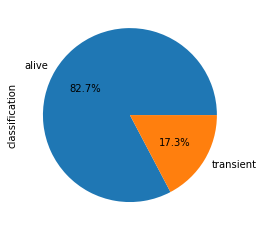

In [14]:
plt.figure()
MC_results['classification'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Luminosity sampling, uniform vs normal

In [15]:
N_mc  = 10000
N_sys = 500
results_list = []

for source in sources.index[0:3]:
    print(f'Doing source: {source}')
    subset = data[data['SRCID'] == source].sort_values(by=['MJD_START'])
    simulated_luminosities = []
    
    for index, row in subset.iterrows():
        L_sample = np.random.normal(loc=row['EP_8_LUMINOSITY'], scale=row['EP_8_LUMINOSITY_ERR'], size=N_mc)
        L_mean = np.mean(L_sample)
        L_std  = np.std(L_sample)

        L_sample_uni = np.random.uniform(row['EP_8_LUMINOSITY']-row['EP_8_LUMINOSITY_ERR'], row['EP_8_LUMINOSITY_ERR']+row['EP_8_LUMINOSITY_ERR'], size=N_mc)
        L_mean_uni = np.mean(L_sample_uni)
        L_std_uni  = np.std(L_sample_uni)
        
        
        print(f"index: {index} \t EP_8_LUMINOSITY: {row['EP_8_LUMINOSITY']:.2e} +- {row['EP_8_LUMINOSITY_ERR']:.2e} \t Normal_10000: L={L_mean:.2e} +- {L_std:.2e} \t min={min(L_sample):.2e} \t Uniform_10000 L={L_mean_uni:.2e} +- {L_std_uni:.2e} \t min={min(L_sample_uni):.2e}")

Doing source: 894
index: 639 	 EP_8_LUMINOSITY: 8.77e+39 +- 9.06e+37 	 Normal_10000: L=8.77e+39 +- 8.99e+37 	 min=8.46e+39 	 Uniform_10000 L=4.44e+39 +- 2.46e+39 	 min=1.82e+38
index: 647 	 EP_8_LUMINOSITY: 1.14e+40 +- 8.06e+38 	 Normal_10000: L=1.14e+40 +- 8.15e+38 	 min=8.23e+39 	 Uniform_10000 L=6.10e+39 +- 2.60e+39 	 min=1.61e+39
index: 640 	 EP_8_LUMINOSITY: 1.77e+40 +- 3.32e+38 	 Normal_10000: L=1.77e+40 +- 3.28e+38 	 min=1.66e+40 	 Uniform_10000 L=9.07e+39 +- 4.83e+39 	 min=6.64e+38
index: 644 	 EP_8_LUMINOSITY: 1.68e+40 +- 4.66e+38 	 Normal_10000: L=1.68e+40 +- 4.64e+38 	 min=1.52e+40 	 Uniform_10000 L=8.62e+39 +- 4.46e+39 	 min=9.34e+38
index: 648 	 EP_8_LUMINOSITY: 1.32e+40 +- 5.15e+38 	 Normal_10000: L=1.32e+40 +- 5.20e+38 	 min=1.11e+40 	 Uniform_10000 L=6.85e+39 +- 3.35e+39 	 min=1.03e+39
index: 641 	 EP_8_LUMINOSITY: 1.43e+40 +- 2.90e+38 	 Normal_10000: L=1.43e+40 +- 2.89e+38 	 min=1.33e+40 	 Uniform_10000 L=7.32e+39 +- 3.91e+39 	 min=5.81e+38
index: 645 	 EP_8_LUMINOSITY

# 31/03/2020 Getting array of N_sys*N_mc of luminosities from catalogue

In [17]:
import powerlaw

In [18]:
data = df_earnshaw()

In [19]:
err_cutoff = 0.8
sub = data[['SRCID', 'DISTANCE_BEST', 'MJD_START', 'EP_8_LUMINOSITY', 'EP_8_LUMINOSITY_ERR']].copy()
sub['L_ERR_RATIO'] = sub['EP_8_LUMINOSITY_ERR']  / sub['EP_8_LUMINOSITY']
sub_filt = sub[sub['L_ERR_RATIO'] < err_cutoff]
sub

print(f'filter performed(L_ERR_RATIO<{err_cutoff}): old length: {len(sub)} new length: {len(sub_filt)} change: {len(sub_filt) - len(sub)}')
N_srcid_unique_old = len(sub['SRCID'].unique())
N_srcid_unique_new = len(sub_filt['SRCID'].unique())
print(f'filter performed: old unique SRCID: {N_srcid_unique_old} NEW unique SRCID: {N_srcid_unique_new} change: {N_srcid_unique_new - N_srcid_unique_old}')


filter performed(L_ERR_RATIO<0.8): old length: 2139 new length: 2053 change: -86
filter performed: old unique SRCID: 1314 NEW unique SRCID: 1259 change: -55


In [20]:
sub

,SRCID,DISTANCE_BEST,MJD_START,EP_8_LUMINOSITY,EP_8_LUMINOSITY_ERR,L_ERR_RATIO
0,118684,0.981200,52996.978380,2.692657e+36,1.013417e+36,0.376363
1,118656,0.981200,52996.978380,7.985324e+36,1.250692e+36,0.156624
2,118560,0.981200,52996.978380,5.147298e+36,1.213765e+36,0.235806
3,118540,0.981200,52996.978380,4.711121e+36,1.317196e+36,0.279593
4,122027,0.757714,52823.765810,5.400172e+35,1.793150e+35,0.332054
...,...,...,...,...,...,...
2134,43541,135.720001,56068.510590,7.370659e+40,2.940729e+40,0.398978
2135,236202,24.906666,52241.631181,8.350492e+38,2.723975e+38,0.326205
2136,241323,22.799999,53536.690347,3.531174e+39,8.007255e+38,0.226759
2137,239871,57.026669,52446.823507,1.040011e+40,1.483431e+39,0.142636


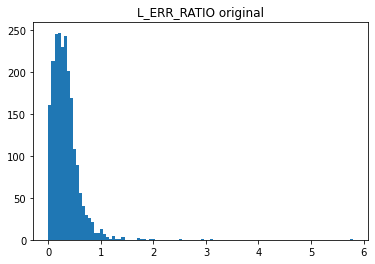

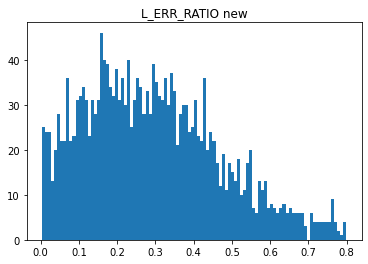

In [21]:
plt.title('L_ERR_RATIO original')
plt.hist(sub['L_ERR_RATIO'], bins=100)
plt.show()
plt.title('L_ERR_RATIO new')
plt.hist(sub_filt['L_ERR_RATIO'], bins=100)
plt.show()

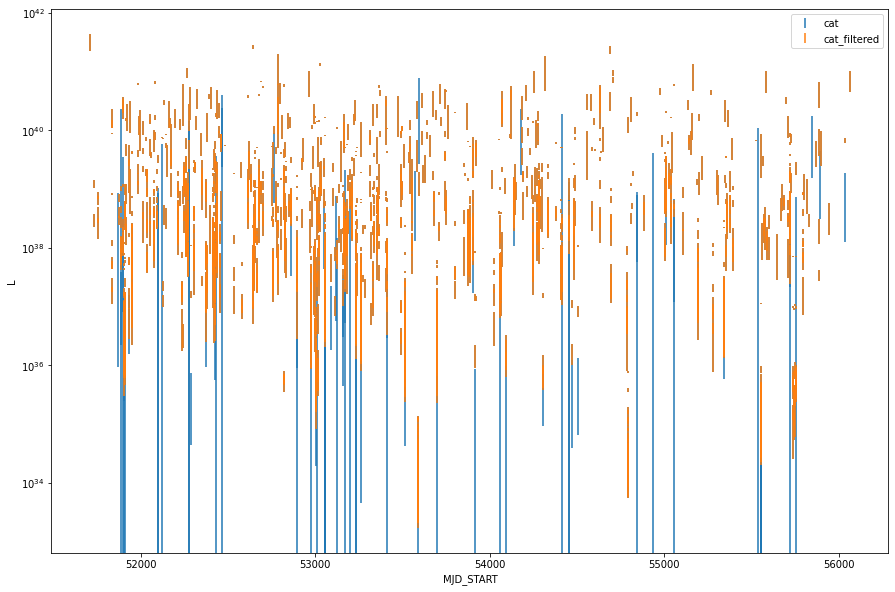

In [22]:
plt.figure(figsize=(15,10))
plt.errorbar(sub['MJD_START'], sub['EP_8_LUMINOSITY'], yerr=sub['EP_8_LUMINOSITY_ERR'], linestyle='none', label='cat')
plt.errorbar(sub_filt['MJD_START'], sub_filt['EP_8_LUMINOSITY'], yerr=sub_filt['EP_8_LUMINOSITY_ERR'], linestyle='none', label='cat_filtered')
plt.ylabel('L')
plt.xlabel('MJD_START')
plt.legend()
plt.yscale('log')

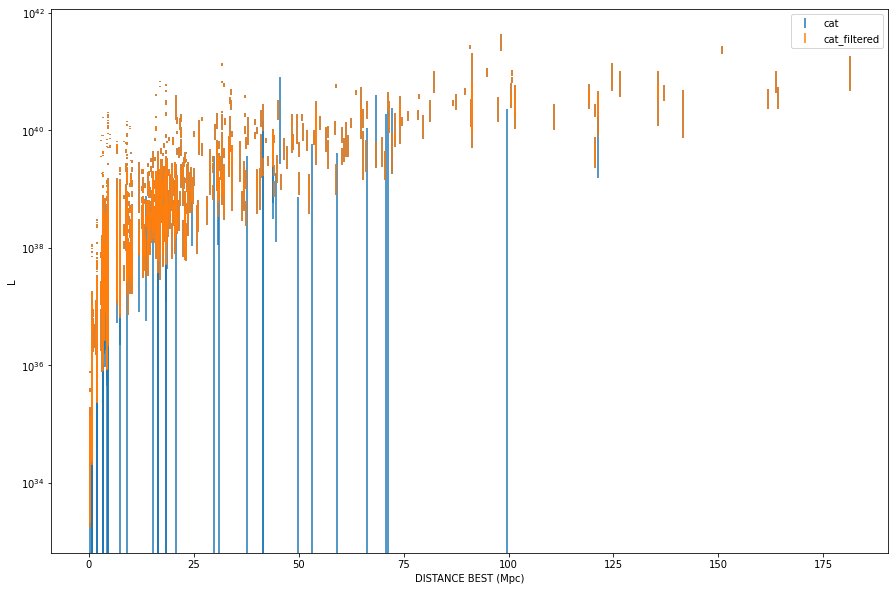

In [23]:
plt.figure(figsize=(15,10))
plt.errorbar(sub['DISTANCE_BEST'], sub['EP_8_LUMINOSITY'], yerr=sub['EP_8_LUMINOSITY_ERR'], linestyle='none', label='cat')
plt.errorbar(sub_filt['DISTANCE_BEST'], sub_filt['EP_8_LUMINOSITY'], yerr=sub_filt['EP_8_LUMINOSITY_ERR'], linestyle='none', label='cat_filtered')

plt.ylabel('L')
plt.xlabel('DISTANCE BEST (Mpc)')
plt.legend()
plt.yscale('log')


In [24]:
def L_samp(series):
    return np.random.normal(series['EP_8_LUMINOSITY'], scale=series['EP_8_LUMINOSITY_ERR'])

N_mc = 10000
N_sys = 500
Ls = np.ndarray((N_mc, N_sys))
for i in tqdm(range(N_mc)):
    samp = sub_filt.sample(500).apply(L_samp, axis=1)
    Ls[i] = samp.values

100%|██████████| 10000/10000 [00:58<00:00, 171.88it/s]


In [25]:
np.save(f'../data/L_samp_earnshaw,N_mc-{N_mc},N_sys-{N_sys}.npy', Ls)

<ipython-input-41-6903ab14da70>:3: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(Ls[7]), bins=bins, label='Single sample catalogue histogram')


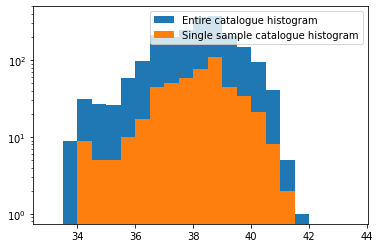

In [41]:
data = df_earnshaw()
plt.hist(np.log10(data['EP_8_LUMINOSITY']), bins=bins, label='Entire catalogue histogram')
plt.hist(np.log10(Ls[7]), bins=bins, label='Single sample catalogue histogram')
plt.yscale('log')
plt.legend()
plt.show()

<ipython-input-28-0a895248aab0>:1: RuntimeWarning: invalid value encountered in log10
  hist = np.histogram(np.log10(Ls[0]), bins=bins)[0]


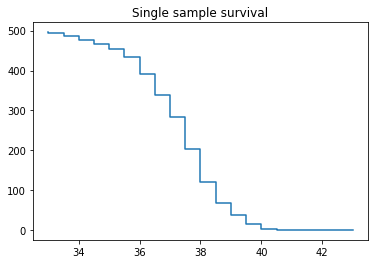

In [28]:
hist = np.histogram(np.log10(Ls[0]), bins=bins)[0]
hist_cum = np.cumsum(hist)
hist_surv = sum(hist) - hist_cum
plt.title('Single sample survival')
plt.step(bins[:-1], hist_surv)

01/04/2021

One thing that I could do is take Earnshaw's catalogue and incoperate the average
eRASS flux limit and see what the effect of eRASS would be on our sample.

In [30]:
Mpc = 3.086e24    #cm
erass1 = 4.14e-14 # erg s^-1 cm^-2
erass8 = 1.1e-14  # erg s^-1 cm^-2
erass1*4*np.pi*(5*Mpc)**2  # Detection limit at 5Mpc
erass8*4*np.pi*(5*Mpc)**2  # Detection limit at 5Mpc
erass8*4*np.pi*(10*Mpc)**2 # Detection limit at 5Mpc
erass8*4*np.pi*(20*Mpc)**2 # Detection limit at 5Mpc
erass1*4*np.pi*(10*Mpc)**2 # Detection limit at 5Mpc
erass1*4*np.pi*(20*Mpc)**2 # Detection limit at 5Mpc
np.sqrt(1e39 / (erass1*np.pi*4)) / Mpc # ULX Detection distance erass 1 = 14.2Mpc
np.sqrt(1e39 / (erass8*np.pi*4)) / Mpc # ULX detection distance erass 8 = 27.56Mpc

27.561497072626782

In [31]:
data = df_earnshaw()

In [32]:
sub = data[data['DISTANCE_BEST'] < 27.561497072626782]
print(f'sources within 27.56Mpc = {len(sub["SRCID"].unique())}')
sub = sub[sub['EP_8_LUMINOSITY'] > 1E39]
print(f'ULXs within 27.56Mpc = {len(sub["SRCID"].unique())}')

sources within 27.56Mpc = 1118
ULXs within 27.56Mpc = 163


In [33]:
sub = data[data['DISTANCE_BEST'] < 14.2]
print(f'sources within 14.2Mpc = {len(sub["SRCID"].unique())}')
sub = sub[sub['EP_8_LUMINOSITY'] > 1E39]
print(f'ULXs within 14.2Mpc = {len(sub["SRCID"].unique())}')

sources within 14.2Mpc = 793
ULXs within 14.2Mpc = 50
